| [**Overview**](./00_overview.ipynb) | [Getting Started](./01_jupyter_python.ipynb) | **Examples:** | [Access](./02_accessing_indexing.ipynb) | [Transform](./03_transform.ipynb) | [Plotting](./04_simple_vis.ipynb) | [Norm-Spiders](./05_norm_spiders.ipynb) | [Minerals](./06_minerals.ipynb) | [lambdas](./07_lambdas.ipynb) |
| ----------------------------------- | -------------------------------------------- | ------------- | --------------------------------------- | --------------------------------- | --------------------------------- | --------------------------------------- | ------------------------------- | ----------------------------- |

# Normalisation and Spider Plots

In [1]:
from pyrolite.util.synthetic import example_spider_data

df = example_spider_data(start="DM_SS2004", norm_to=None, noise_level=0.2) # unnormalised dataframe based around depleted mantle

### Spider Plots

Visualisation of multivariate patterns in geochemical data can be a challenge, but one tool well adpated to is the 'spiderplot'. In most cases, you'll want to visualise normalised data (e.g. to Chondrite or Primitive Mantle) such that the effects of nuceleosynthesis and planetary formation are removed and you can instead dig deeper into processes which have happend since. The `pyrolite.pyrochem` API can be chained together with the `pyolite.pyroplot` API to do this in one line.

<AxesSubplot:>

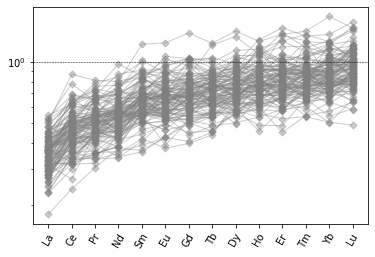

In [2]:
df.pyrochem.REE.pyrochem.normalize_to('PM_PON').pyroplot.spider(unity_line=True, color='0.5', alpha=0.4)

For the REE data specifically, there's also a method which will scale axes to ionic radii:

<AxesSubplot:xlabel='Element', ylabel=' $\\mathrm{X / X_{Reference}}$'>

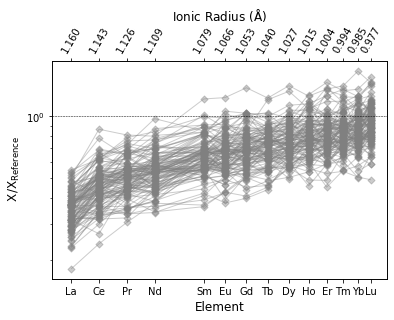

In [3]:
df.pyrochem.REE.pyrochem.normalize_to('PM_PON').pyroplot.REE(unity_line=True, color='0.5', alpha=0.4)

We can also style this as above, including by colormapping a particular variable:

<AxesSubplot:xlabel='Element', ylabel=' $\\mathrm{X / X_{Reference}}$'>

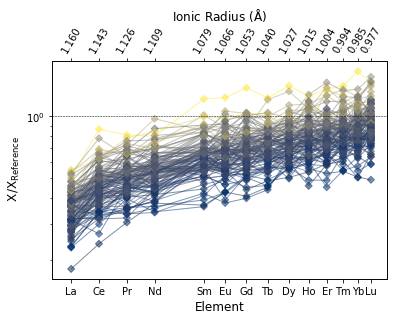

In [4]:
df.pyrochem.REE.pyrochem.normalize_to('PM_PON').pyroplot.REE(unity_line=True, c=df['MgO'], cmap='cividis', alpha=0.5)

We can also make conditional density spider plots:

<AxesSubplot:xlabel='Element', ylabel=' $\\mathrm{X / X_{Reference}}$'>

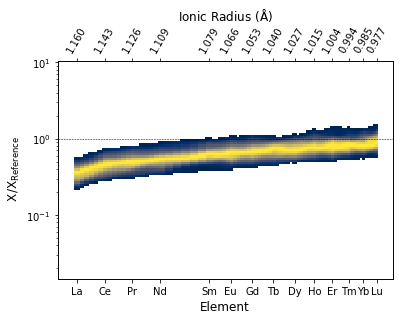

In [5]:
df.pyrochem.REE.pyrochem.normalize_to('PM_PON').pyroplot.REE(unity_line=True, mode='binkde', bins=100, yextent=(0.1, 1.5), vmin=0.03, cmap='cividis')

| [**Overview**](./00_overview.ipynb) | [Getting Started](./01_jupyter_python.ipynb) | **Examples:** | [Access](./02_accessing_indexing.ipynb) | [Transform](./03_transform.ipynb) | [Plotting](./04_simple_vis.ipynb) | [Norm-Spiders](./05_norm_spiders.ipynb) | [Minerals](./06_minerals.ipynb) | [lambdas](./07_lambdas.ipynb) |
| ----------------------------------- | -------------------------------------------- | ------------- | --------------------------------------- | --------------------------------- | --------------------------------- | --------------------------------------- | ------------------------------- | ----------------------------- |